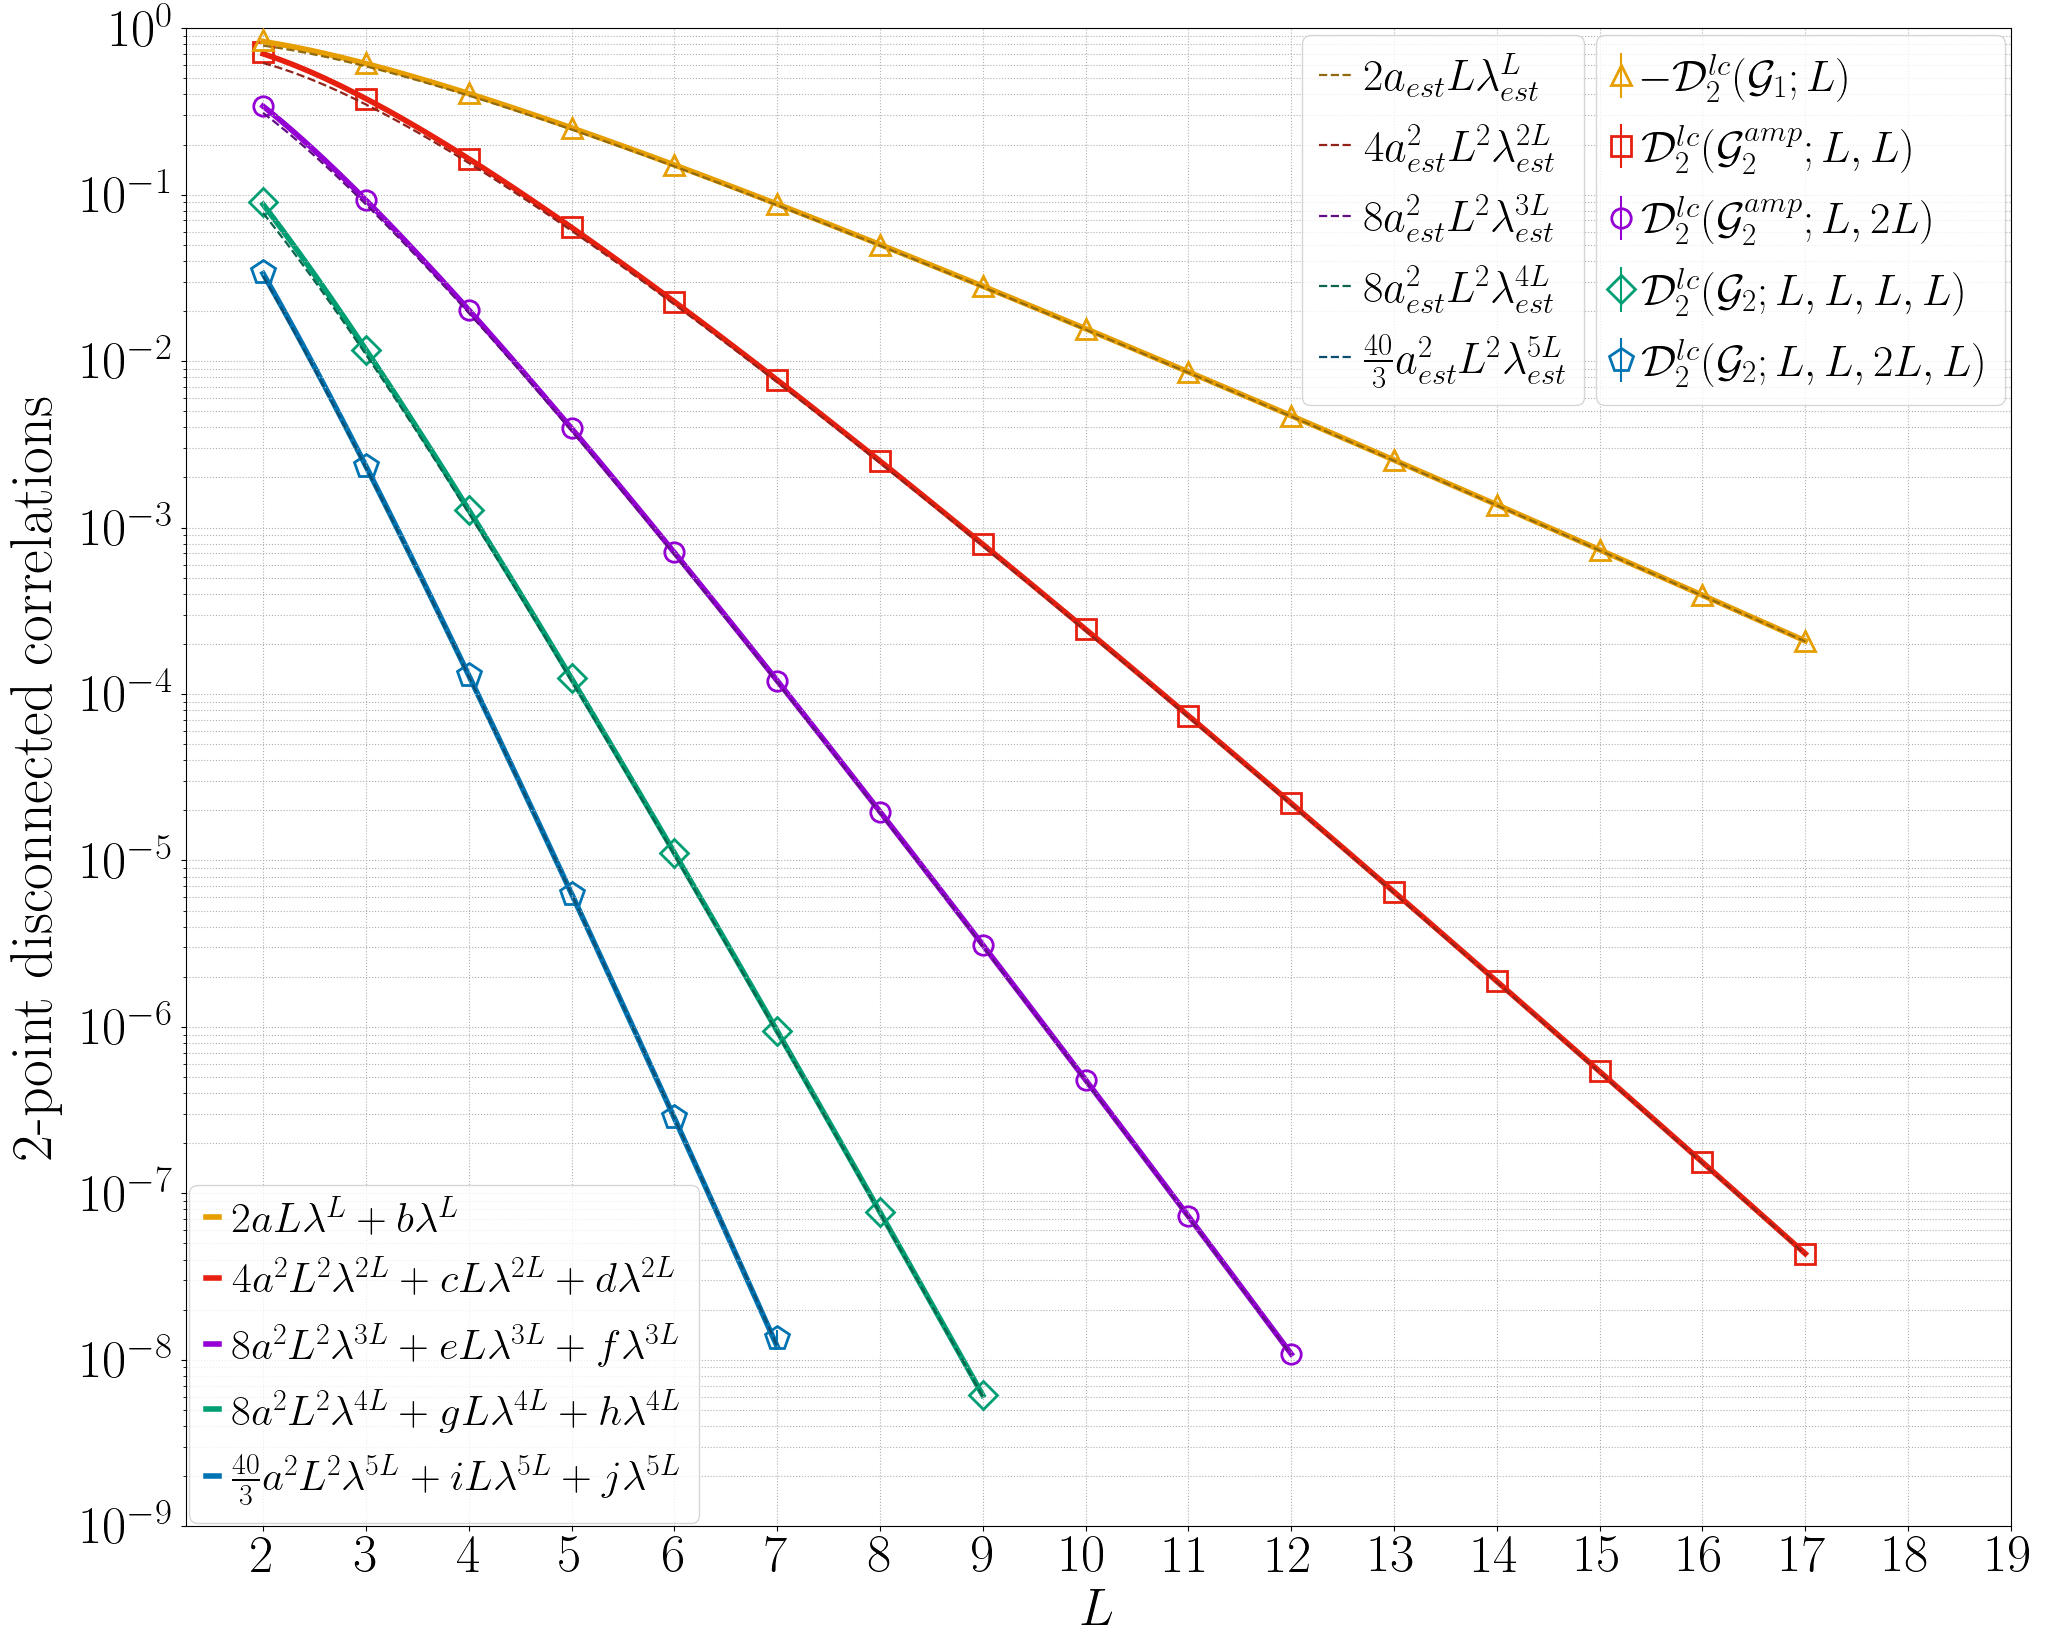

DOF: 52
λ: 0.50050944 +/- 0.00001224
a: 0.78471611 +/- 0.00035613
b: 0.18390086 +/- 0.00253297
c: 0.51379096 +/- 0.01272582
d: 0.31456740 +/- 0.02318023
e: 0.75839531 +/- 0.02188122
f: 0.43010383 +/- 0.05130546
g: 0.57299249 +/- 0.05396222
h: 1.37888468 +/- 0.16859218
i: 0.73526401 +/- 0.19693866
j: -0.06805851 +/- 0.07021331
Chi-squared: 52.03618859888351
Reduced chi-squared: 1.0006959345939137
P-value: 0.47250457934413714
Residui normalizzati ordinati per funzione f:
 L  Residuo Normalizzato
 4              1.469935
 6             -1.076654
 7             -0.978017
 5             -0.811336
 8             -0.639843
 9             -0.516263
12             -0.357592
10             -0.321410
11             -0.319257
13             -0.257009
14             -0.209573
15             -0.199605
16             -0.158223
17             -0.086095
19             -0.065432
18             -0.064204

Residui normalizzati ordinati per funzione g:
 L  Residuo Normalizzato
 4             -4.383759
 7  

In [2]:
import numpy as np
import scipy.optimize as optimization
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set Matplotlib fonts with LaTeX
rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 25})  # Change font size

# Function definitions
def ff(x, a, b, lambda_val):
    return 2 * a * x * lambda_val**(x) + b * lambda_val**(x)

def g(x, a, c, d, lambda_val):
    return 4 * a * a * x * x * lambda_val**(2*x) + c * x * lambda_val**(2*x) + d * lambda_val**(2*x)

def h(x, a, e, f, lambda_val):
    return 8 * a * a * x * x * lambda_val**(3*x) + e * x * lambda_val**(3*x) + f * lambda_val**(3*x)

def i(x, a, gg, hh, lambda_val):
    return 8 * a * a * x * x * lambda_val**(4*x) + gg * x * lambda_val**(4*x) + hh * lambda_val**(4*x)

def j(x, a, ii, jj, lambda_val):
    return 40/3 * a * a * x * x * lambda_val**(5*x) + ii * x * lambda_val**(5*x) + jj * lambda_val**(4*x)

def m(x, lambda_val, a, b, c, d, e, f, gg, hh, ii, jj):
    idx_f = len(fdata)
    idx_g = idx_f + len(gdata)
    idx_h = idx_g + len(hdata)
    idx_i = idx_h + len(idata)
    idx_j = idx_i + len(jdata)
    
    xfdata = x[:idx_f]
    xgdata = x[idx_f:idx_g]
    xhdata = x[idx_g:idx_h]
    xidata = x[idx_h:idx_i]
    xjdata = x[idx_i:idx_j]

    fr = ff(xfdata, a, b, lambda_val)
    gr = g(xgdata, a, c, d, lambda_val)
    hr = h(xhdata, a, e, f, lambda_val)
    ir = i(xidata, a, gg, hh, lambda_val)
    jr = j(xjdata, a, ii, jj, lambda_val)
    
    mr = np.hstack((fr, gr, hr, ir, jr))
    return mr


# Paths to data files inside analysis_dir
file_path_bare = f"../analisi_dati_PJ/PJ_media.dat"
file_path_loop_LL = f"../analisi_dati_disc_loop_amp_lc/disc_LL_lc_amp_media.dat"
file_path_loop_L2L = f"../analisi_dati_disc_loop_amp_lc/disc_L2L_lc_amp_media.dat"
file_path_loop_LLLL = f"../analisi_dati_disc_loop_lc/disc_LLLL_lc_media_new.dat"
file_path_loop_LL2LL = f"../analisi_dati_disc_loop_lc/disc_LL2LL_lc_media_new.dat"


# Reading .dat files
data_bare = pd.read_csv(file_path_bare, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_LL = pd.read_csv(file_path_loop_LL, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_L2L = pd.read_csv(file_path_loop_L2L, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_LLLL = pd.read_csv(file_path_loop_LLLL, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_LL2LL = pd.read_csv(file_path_loop_LL2LL, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])

# Filtering data
frangeA, frangeB = 4, 19
f_inf, f_sup = 2, 17
data_bare_filtered = data_bare[data_bare['L'].isin(np.linspace(frangeA, frangeB, frangeB - frangeA + 1))]
data_bare_non_filtered = data_bare[data_bare['L'].isin(np.linspace(f_inf, f_sup, f_sup - f_inf + 1))]
xfdata = data_bare_filtered['L'].values
fdata = data_bare_filtered['corr'].values
fdata_err = data_bare_filtered['err'].values

grangeA, grangeB = 3, 17
g_inf, g_sup = 2, 17
data_loop_LL_filtered = data_loop_LL[data_loop_LL['L'].isin(np.linspace(grangeA, grangeB, grangeB - grangeA + 1))]
data_loop_LL_non_filtered = data_loop_LL[data_loop_LL['L'].isin(np.linspace(g_inf, g_sup, g_sup - g_inf + 1))]
xgdata = data_loop_LL_filtered['L'].values
gdata = data_loop_LL_filtered['corr'].values
gdata_err = data_loop_LL_filtered['err'].values

hrangeA, hrangeB = 3, 15
h_inf, h_sup = 2, 12
data_loop_L2L_filtered = data_loop_L2L[data_loop_L2L['L'].isin(np.linspace(hrangeA, hrangeB, hrangeB - hrangeA + 1))]
data_loop_L2L_non_filtered = data_loop_L2L[data_loop_L2L['L'].isin(np.linspace(h_inf, h_sup, h_sup - h_inf + 1))]
xhdata = data_loop_L2L_filtered['L'].values
hdata = data_loop_L2L_filtered['corr'].values
hdata_err = data_loop_L2L_filtered['err'].values

irangeA, irangeB = 3, 14
i_inf, i_sup = 2, 9
data_loop_LLLL_filtered = data_loop_LLLL[data_loop_LLLL['L'].isin(np.linspace(irangeA, irangeB, irangeB - irangeA + 1))]
data_loop_LLLL_non_filtered = data_loop_LLLL[data_loop_LLLL['L'].isin(np.linspace(i_inf, i_sup, i_sup - i_inf + 1))]
xidata = data_loop_LLLL_filtered['L'].values
idata = data_loop_LLLL_filtered['corr'].values
idata_err = data_loop_LLLL_filtered['err'].values

jrangeA, jrangeB = 3, 9
j_inf, j_sup = 2, 7
data_loop_LL2LL_filtered = data_loop_LL2LL[data_loop_LL2LL['L'].isin(np.linspace(jrangeA, jrangeB, jrangeB - jrangeA + 1))]
data_loop_LL2LL_non_filtered = data_loop_LL2LL[data_loop_LL2LL['L'].isin(np.linspace(j_inf, j_sup, j_sup - j_inf + 1))]
xjdata = data_loop_LL2LL_filtered['L'].values
jdata = data_loop_LL2LL_filtered['corr'].values
jdata_err = data_loop_LL2LL_filtered['err'].values

# Concatenate all data
mdata = np.hstack((fdata, gdata, hdata, idata, jdata))
mdata_err = np.hstack((fdata_err, gdata_err, hdata_err, idata_err, jdata_err))
xdata_new = np.hstack((xfdata, xgdata, xhdata, xidata, xjdata))

# Fit the curve
popt, pcov = optimization.curve_fit(f=m, xdata=xdata_new, ydata=mdata, sigma=mdata_err, absolute_sigma=True, 
                                    p0=[0.5, 0.78, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

# Calculate fitted function values
xf_fit = np.linspace(f_inf, f_sup, 100)
xg_fit = np.linspace(g_inf, g_sup, 100)
xh_fit = np.linspace(h_inf, h_sup, 100)
xi_fit = np.linspace(i_inf, i_sup, 100)
xj_fit = np.linspace(j_inf, j_sup, 100)

f_fit = ff(xf_fit, *popt[1:3], popt[0])
g_fit = g(xg_fit, popt[1], *popt[3:5], popt[0])
h_fit = h(xh_fit, popt[1], *popt[5:7], popt[0])
i_fit = i(xi_fit, popt[1], *popt[7:9], popt[0])
j_fit = j(xj_fit, popt[1], *popt[9:11], popt[0])

# Define new curves with designated parameters
a = 0.78496
lambda_val = 0.5004937

curva1 = 2 * a * xf_fit * lambda_val**(xf_fit)
curva2 = 4 * a**2 * xg_fit * xg_fit * lambda_val**(2*xg_fit)
curva3 = 8 * a**2 * xh_fit * xh_fit * lambda_val**(3*xh_fit)
curva4 = 8 * a**2 * xi_fit * xi_fit * lambda_val**(4*xi_fit)
curva5 = 40/3 * a**2 * xj_fit * xj_fit * lambda_val**(5*xj_fit)

# Plot data and fitted functions
fig, ax = plt.subplots(figsize=(21, 17))

# Plot original data
ax.errorbar(data_bare_non_filtered['L'].values, data_bare_non_filtered['corr'].values, yerr=data_bare_non_filtered['err'].values, fmt='^', markeredgewidth=2, markerfacecolor='none', markersize=14, label='$-\mathcal{D}_{2}^{lc}(\mathcal{G}_1;L)$', color='#e69e00', zorder=6)
ax.plot(xf_fit, f_fit, label=r'$2 a L \lambda^{L} + b \lambda^{L}$', color='#e69e00', zorder=5, linewidth=4)

ax.errorbar(data_loop_LL_non_filtered['L'].values, data_loop_LL_non_filtered['corr'].values, yerr=data_loop_LL_non_filtered['err'].values, fmt='s', markeredgewidth=2,  markerfacecolor='none', markersize=14, label='$\mathcal{D}_{2}^{lc}(\mathcal{G}_2^{amp};L,L)$', color='#e61f0f', zorder=4)
ax.plot(xg_fit, g_fit, label=r'$4 a^2 L^2 \lambda^{2L} + c L \lambda^{2L} + d \lambda^{2L}$', color='#e61f0f', zorder=3, linewidth=4)

ax.errorbar(data_loop_L2L_non_filtered['L'].values, data_loop_L2L_non_filtered['corr'].values, yerr=data_loop_L2L_non_filtered['err'].values, fmt='o', markeredgewidth=2, markerfacecolor='none', markersize=14, label='$\mathcal{D}_{2}^{lc}(\mathcal{G}_2^{amp};L,2L)$', color='#9400d4', zorder=2)
ax.plot(xh_fit, h_fit, label=r'$8 a^2 L^2 \lambda^{3L} + e L \lambda^{3L} + f \lambda^{3L}$', color='#9400d4', zorder=1, linewidth=4)

ax.errorbar(data_loop_LLLL_non_filtered['L'].values, data_loop_LLLL_non_filtered['corr'].values, yerr=data_loop_LLLL_non_filtered['err'].values, fmt='D', markeredgewidth=2, markerfacecolor='none', markersize=14, label='$\mathcal{D}_{2}^{lc}(\mathcal{G}_2;L,L,L,L)$', color='#009e73', zorder=2)
ax.plot(xi_fit, i_fit, label=r'$8 a^2 L^2 \lambda^{4L} + g L \lambda^{4L} + h \lambda^{4L}$', color='#009e73', zorder=1, linewidth=4)

ax.errorbar(data_loop_LL2LL_non_filtered['L'].values, data_loop_LL2LL_non_filtered['corr'].values, yerr=data_loop_LL2LL_non_filtered['err'].values, fmt='p', markeredgewidth=2, markerfacecolor='none', markersize=18, label='$\mathcal{D}_{2}^{lc}(\mathcal{G}_2;L,L,2L,L)$', color='#0073b2', zorder=2)
ax.plot(xj_fit, j_fit, label=r'$\frac{40}{3} a^2 L^2 \lambda^{5L} + i L \lambda^{5L} + j \lambda^{5L}$', color='#0073b2', zorder=1, linewidth=4)

# Plot nuove curve
ax.plot(xf_fit, curva1, '--', color='#916910', label=r'$2 a_{est} L \lambda_{est}^{L}$', zorder=7, linewidth=1.6)
ax.plot(xg_fit, curva2, '--', color='#92231a', label=r'$4 a_{est}^2 L^2 \lambda_{est}^{2L}$', zorder=7, linewidth=1.6)
ax.plot(xh_fit, curva3, '--', color='#620f86', label=r'$8 a_{est}^2 L^2 \lambda_{est}^{3L}$', zorder=7, linewidth=1.6)
ax.plot(xi_fit, curva4, '--', color='#0b644b', label=r'$8 a_{est}^2 L^2 \lambda_{est}^{4L}$', zorder=7, linewidth=1.6)
ax.plot(xj_fit, curva5, '--', color='#0c4d70', label=r'$\frac{40}{3} a_{est}^2 L^2 \lambda_{est}^{5L}$', zorder=7, linewidth=1.6)

# Layout 
ax.set_yscale('log')
ax.set_xlabel(r'$L$', fontsize=38)
plt.rcParams['font.family'] = 'CMU Serif'
ax.set_ylabel('2-point disconnected correlations', labelpad=15, fontsize=42)
ax.legend(loc='best', fontsize=22, frameon=False)

plt.xticks(fontsize=38)  # Change font size x axis
plt.yticks(fontsize=38)  # Change font size u axis

# Add tikcs for integers
ax.set_xticks(np.arange(2, max(xdata_new) + 1, 1))

# Legends (separated)
handles, labels = ax.get_legend_handles_labels()

# Data legend
legend1 = ax.legend(handles[:5], labels[:5], loc='lower left', fontsize=31, bbox_to_anchor=(-0.01, -0.012), handletextpad=0.3, handlelength=0.3)

# Functions legend 1
legend2 = ax.legend(handles[5:10], labels[5:10], loc='upper right', fontsize=32, bbox_to_anchor=(0.778, 1.01), handletextpad=0.3, handlelength=0.7)

# Functions legend 1
legend3 = ax.legend(handles[10:], labels[10:], loc='upper right', fontsize=32, bbox_to_anchor=(1.009,1.01), handletextpad=0.3, handlelength=0.3)

# Add first legend to axis
ax.add_artist(legend1)
ax.add_artist(legend2)

ax.set_ylim(10**(-9), 10**(0))

# Set grid
ax.grid(True, zorder=0)
plt.grid(True, which="both", ls="dotted", linewidth=0.8)

plt.tight_layout()
plt.savefig('joint_fit_2point_disc.pdf', format='pdf', dpi=300)
plt.show()


# Residue computation
residuals = mdata - m(xdata_new, *popt)

# Reduced chi-squared computation
chi_squared = np.sum((residuals / mdata_err)**2)
dof = len(mdata) - len(popt)  # gradi di libertà
print(f"DOF: {dof}")
reduced_chi_squared = chi_squared / dof

# Compute p-value
p_value = 1 - stats.chi2.cdf(chi_squared, dof)

# unpack the results
fit_λ, fit_a, fit_b, fit_c, fit_d, fit_e, fit_f, fit_g, fit_h, fit_i, fit_j = popt
fit_sλ, fit_sa, fit_sb, fit_sc, fit_sd, fit_se, fit_sf, fit_sg, fit_sh, fit_si, fit_sj = np.sqrt(np.diag(pcov))

# print the fit results:
print("λ: %.8f +/- %.8f" % (fit_λ, fit_sλ))
print("a: %.8f +/- %.8f" % (fit_a, fit_sa))
print("b: %.8f +/- %.8f" % (fit_b, fit_sb))
print("c: %.8f +/- %.8f" % (fit_c, fit_sc))
print("d: %.8f +/- %.8f" % (fit_d, fit_sd))
print("e: %.8f +/- %.8f" % (fit_e, fit_se))
print("f: %.8f +/- %.8f" % (fit_f, fit_sf))
print("g: %.8f +/- %.8f" % (fit_g, fit_sg))
print("h: %.8f +/- %.8f" % (fit_h, fit_sh))
print("i: %.8f +/- %.8f" % (fit_i, fit_si))
print("j: %.8f +/- %.8f" % (fit_j, fit_sj))

print(f"Chi-squared: {chi_squared}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
print(f"P-value: {p_value}")








# Compute functions in fitted data
f_fit_full = ff(xfdata, *popt[1:3], popt[0])
g_fit_full = g(xgdata, popt[1], *popt[3:5], popt[0])
h_fit_full = h(xhdata, popt[1], *popt[5:7], popt[0])
i_fit_full = i(xidata, popt[1], *popt[7:9], popt[0])
j_fit_full = j(xjdata, popt[1], *popt[9:11], popt[0])

# Compute residues for each function
residuals_f = fdata - f_fit_full
residuals_g = gdata - g_fit_full
residuals_h = hdata - h_fit_full
residuals_i = idata - i_fit_full
residuals_j = jdata - j_fit_full

# Compute normalized residues
residuals_f_normalized = residuals_f / fdata_err
residuals_g_normalized = residuals_g / gdata_err
residuals_h_normalized = residuals_h / hdata_err
residuals_i_normalized = residuals_i / idata_err
residuals_j_normalized = residuals_j / jdata_err

# Create DataFrame to order normalized results
df_f = pd.DataFrame({'L': xfdata, 'Residuo Normalizzato': residuals_f_normalized})
df_g = pd.DataFrame({'L': xgdata, 'Residuo Normalizzato': residuals_g_normalized})
df_h = pd.DataFrame({'L': xhdata, 'Residuo Normalizzato': residuals_h_normalized})
df_i = pd.DataFrame({'L': xidata, 'Residuo Normalizzato': residuals_i_normalized})
df_j = pd.DataFrame({'L': xjdata, 'Residuo Normalizzato': residuals_j_normalized})

# Order results
df_f_sorted = df_f.reindex(df_f['Residuo Normalizzato'].abs().sort_values(ascending=False).index)
df_g_sorted = df_g.reindex(df_g['Residuo Normalizzato'].abs().sort_values(ascending=False).index)
df_h_sorted = df_h.reindex(df_h['Residuo Normalizzato'].abs().sort_values(ascending=False).index)
df_i_sorted = df_i.reindex(df_i['Residuo Normalizzato'].abs().sort_values(ascending=False).index)
df_j_sorted = df_j.reindex(df_j['Residuo Normalizzato'].abs().sort_values(ascending=False).index)

# Print results
print("Residui normalizzati ordinati per funzione f:")
print(df_f_sorted.to_string(index=False))

print("\nResidui normalizzati ordinati per funzione g:")
print(df_g_sorted.to_string(index=False))

print("\nResidui normalizzati ordinati per funzione h:")
print(df_h_sorted.to_string(index=False))

print("\nResidui normalizzati ordinati per funzione i:")
print(df_i_sorted.to_string(index=False))

print("\nResidui normalizzati ordinati per funzione j:")
print(df_j_sorted.to_string(index=False))

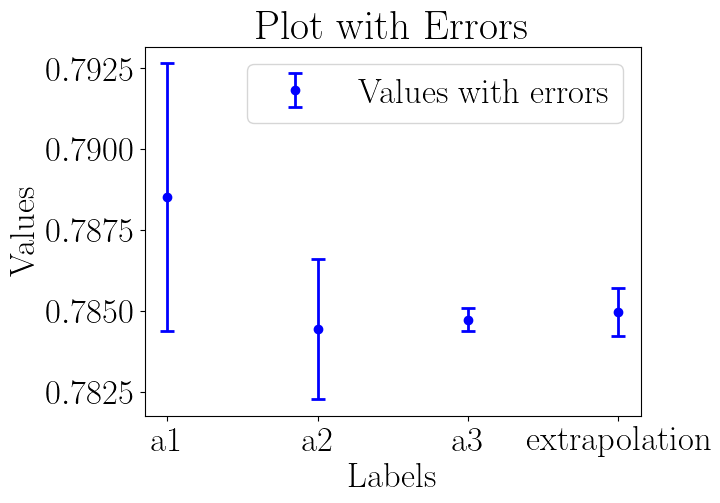

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Data
values = np.array([0.78851559, 0.78443093, 0.78471611, 0.78496])
errors = np.array([0.00412745, 0.00217127, 0.00035613, 0.00075])
labels = ['a1', 'a2', 'a3', 'extrapolation']


# Positions on the plot
positions = np.arange(len(values))


# Create the plot
plt.errorbar(positions, values, yerr=errors, fmt='o', capsize=5, capthick=2, elinewidth=2, color='blue', label='Values with errors')


# Add labels
plt.xticks(positions, labels)
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Plot with Errors')
plt.legend()


# Show the plot
plt.show()
